In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Duplicate key in file PosixPath('/Users/katoutakaaki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
test_data['Survived'] = np.nan
df = pd.concat([train_data, test_data], ignore_index=True, sort=False)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


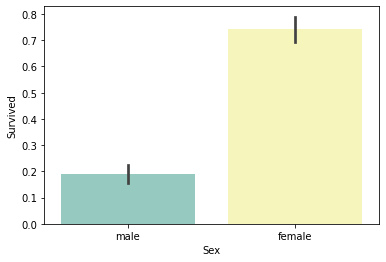

In [4]:
sns.barplot(x = 'Sex', y = 'Survived', data = df, palette = 'Set3')

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
age_df = df[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch']]

In [14]:
age_df = pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values

In [17]:
X = known_age[:, 1:]
y = known_age[:, 0]

In [18]:
rfr = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1)
rfr.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [20]:
predict_age = rfr.predict(unknown_age[:, 1::])
df.loc[(df.Age.isnull()), 'Age'] = predict_age

In [21]:
predict_age

array([28.42121058, 32.80914844, 24.21427915, 28.42121058, 24.21427915,
       28.42121058, 38.05502361, 24.21427915, 28.42121058, 28.42121058,
       28.42121058, 25.88010382, 24.21427915, 26.22853986, 42.91931075,
       42.91931075, 16.93381409, 28.42121058, 28.42121058, 24.21427915,
       28.42121058, 28.42121058, 28.42121058, 28.42121058, 27.06302346,
       28.42121058, 28.42121058, 16.86668987, 22.70854399, 28.42121058,
       28.42121058, 13.12004762, 36.3689894 , 42.91931075, 10.36555952,
       13.4325    , 32.80914844, 42.91931075, 27.06302346, 28.42121058,
       24.21427915, 13.12004762, 25.88010382, 28.42121058,  5.5767684 ,
       24.21427915, 27.06302346, 27.06302346, 28.42121058, 36.44560767,
       28.42121058, 24.21427915, 42.91931075, 24.21427915, 32.80914844,
       42.91931075, 42.91931075, 42.91931075, 24.21427915, 26.22853986,
       31.00289531, 28.42121058, 36.44560767, 13.12004762, 21.04491786,
       38.05502361, 28.42121058, 27.06302346, 42.91931075, 28.42

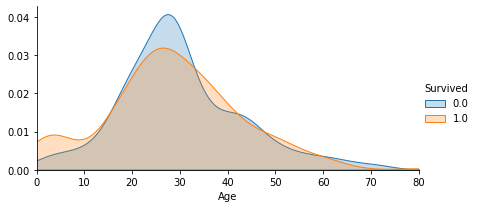

In [25]:
facet = sns.FacetGrid(df[0:890], hue = 'Survived', aspect = 2)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, df.loc[0:890, 'Age'].max()))
facet.add_legend()
plt.show()

<AxesSubplot:xlabel='Title', ylabel='Survived'>

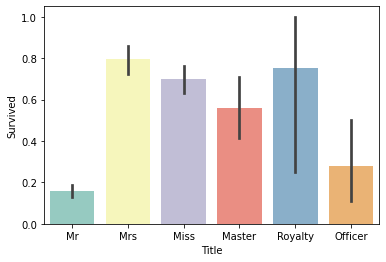

In [32]:
df['Title'] = df['Name'].map(lambda x:x.split(', ')[1].split('. ')[0])
df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
df['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
df['Title'].replace(['Mlle'], 'Miss', inplace=True)
df['Title'].replace(['Jonkheer'], 'Master', inplace=True)
sns.barplot(x='Title', y='Survived', data=df, palette='Set3')

In [41]:
df['Surname'] = df['Name'].map(lambda x:x.split(',')[0].strip())

In [37]:
n = 'Sandstrom, Miss. Marguerite Rut'
m = n.split(',')[0]
m

'Sandstrom'

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.421211,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Royalty,Oliva y Ocana
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.421211,0,0,359309,8.0500,NaN,S,Mr,Ware


In [44]:
df['FamilyGroup'] = df['Surname'].map(df['Surname'].value_counts())

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,FamilyGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.421211,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Royalty,Oliva y Ocana,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.421211,0,0,359309,8.0500,NaN,S,Mr,Ware,4


In [49]:
Female_Child_Group = df.loc[(df['FamilyGroup']>=2)&((df['Age']<=16) | (df['Sex'] == 'female'))]
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
print(Female_Child_Group)
Female_Child_Group.value_counts()

Surname
Abbott            0.5
Abelseth          NaN
Abelson           1.0
Aks               1.0
Allen             1.0
                 ... 
Yasbeck           1.0
Zabour            0.0
de Messemaeker    1.0
del Carlo         NaN
van Billiard      NaN
Name: Survived, Length: 198, dtype: float64


1.000000    113
0.000000     32
0.750000      2
0.333333      1
0.142857      1
0.500000      1
Name: Survived, dtype: int64

In [52]:
Male_Adult_Group = df.loc[(df['FamilyGroup']>=2)&(df['Age']>16)&(df['Sex']=='male')]
Male_Adult_Group = Male_Adult_Group.groupby('Surname')['Survived'].mean()
print(Male_Adult_Group.value_counts())

0.000000    115
1.000000     21
0.500000      6
0.333333      2
0.250000      1
Name: Survived, dtype: int64


In [53]:
Dead_list = set(Female_Child_Group[Female_Child_Group.map(lambda x:x == 0)].index)
Dead_list

{'Arnold-Franchi',
 'Attalah',
 'Barbara',
 'Boulos',
 'Bourke',
 'Cacic',
 'Canavan',
 'Caram',
 'Danbom',
 'Elias',
 'Ford',
 'Goodwin',
 'Ilmakangas',
 'Johnston',
 'Jussila',
 'Lahtinen',
 'Lefebre',
 'Lobb',
 'Olsson',
 'Oreskovic',
 'Palsson',
 'Panula',
 'Rice',
 'Robins',
 'Rosblom',
 'Sage',
 'Skoog',
 'Strom',
 'Turpin',
 'Van Impe',
 'Vander Planke',
 'Zabour'}

In [55]:
Survived_Group = set(Male_Adult_Group[Male_Adult_Group.map(lambda x:x == 1)].index)
Survived_Group

{'Beane',
 'Beckwith',
 'Bishop',
 'Bradley',
 'Cardeza',
 'Chambers',
 'Daly',
 'Dick',
 'Duff Gordon',
 'Frauenthal',
 'Frolicher-Stehli',
 'Goldenberg',
 'Greenfield',
 'Harder',
 'Jonsson',
 'Jussila',
 'Kimball',
 'McCoy',
 'Moubarek',
 'Nakid',
 'Taylor'}

In [57]:
fare = df.loc[(df['Embarked'] == 'S') % (df['Pclass'] == 3), 'Fare'].median()
df['Fare'] = df['Fare'].fillna(fare)

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,FamilyGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.421211,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Royalty,Oliva y Ocana,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.421211,0,0,359309,8.0500,NaN,S,Mr,Ware,4


In [59]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.loc[(df['Family']>=2) & (df['Family']<=4), 'Family_label'] = 2
df.loc[(df['Family']>=5) & (df['Family']<=7) | (df['Family']==1), 'Family_label'] = 1  # == に注意
df.loc[(df['Family']>=8), 'Family_label'] = 0

In [69]:
Ticket_Count = dict(df['Ticket'].value_counts())

In [68]:
Ticket_Count.head(60)

CA. 2343           11
1601                8
CA 2144             8
3101295             7
347077              7
PC 17608            7
347082              7
S.O.C. 14879        7
113781              6
382652              6
347088              6
19950               6
220845              5
W./C. 6608          5
16966               5
113503              5
349909              5
PC 17757            5
4133                5
C.A. 2315           4
PC 17755            4
17421               4
LINE                4
230136              4
12749               4
C.A. 33112          4
36928               4
C.A. 34651          4
113760              4
PC 17760            4
W./C. 6607          4
2666                4
SC/Paris 2123       4
PC 17483            4
24160               4
PC 17582            3
C.A. 37671          3
345773              3
363291              3
C.A. 31029          3
26360               3
C.A. 2673           3
28220               3
PC 17761            3
370129              3
A/5. 851  

In [70]:
Ticket_Countd

{'CA. 2343': 11,
 '1601': 8,
 'CA 2144': 8,
 '3101295': 7,
 '347077': 7,
 'PC 17608': 7,
 '347082': 7,
 'S.O.C. 14879': 7,
 '113781': 6,
 '382652': 6,
 '347088': 6,
 '19950': 6,
 '220845': 5,
 'W./C. 6608': 5,
 '16966': 5,
 '113503': 5,
 '349909': 5,
 'PC 17757': 5,
 '4133': 5,
 'C.A. 2315': 4,
 'PC 17755': 4,
 '17421': 4,
 'LINE': 4,
 '230136': 4,
 '12749': 4,
 'C.A. 33112': 4,
 '36928': 4,
 'C.A. 34651': 4,
 '113760': 4,
 'PC 17760': 4,
 'W./C. 6607': 4,
 '2666': 4,
 'SC/Paris 2123': 4,
 'PC 17483': 4,
 '24160': 4,
 'PC 17582': 3,
 'C.A. 37671': 3,
 '345773': 3,
 '363291': 3,
 'C.A. 31029': 3,
 '26360': 3,
 'C.A. 2673': 3,
 '28220': 3,
 'PC 17761': 3,
 '370129': 3,
 'A/5. 851': 3,
 '239853': 3,
 '2662': 3,
 'PC 17572': 3,
 '2661': 3,
 'C 4001': 3,
 '230080': 3,
 'PC 17756': 3,
 'S.C./PARIS 2079': 3,
 '110152': 3,
 '29750': 3,
 '11767': 3,
 '347080': 3,
 'PC 17758': 3,
 '19877': 3,
 'PP 9549': 3,
 '110413': 3,
 '347742': 3,
 '29103': 3,
 'F.C.C. 13529': 3,
 '33638': 3,
 '29106': 3,
 '

In [76]:
df['TicketGroup'] = df['Ticket'].map(Ticket_Count)

In [72]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,FamilyGroup,Family,Family_label,Ticket_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,2,2.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,2,2.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,1,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,2,2.0,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,2,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.421211,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,1,1,1.0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Royalty,Oliva y Ocana,1,1,1.0,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,1,1,1.0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.421211,0,0,359309,8.0500,NaN,S,Mr,Ware,4,1,1.0,1


<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

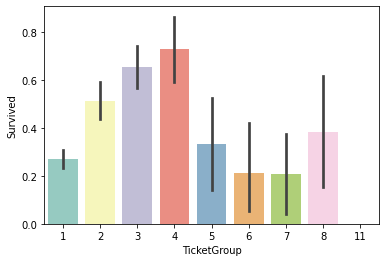

In [77]:
sns.barplot(x = 'TicketGroup', y = 'Survived', data = df, palette = 'Set3')

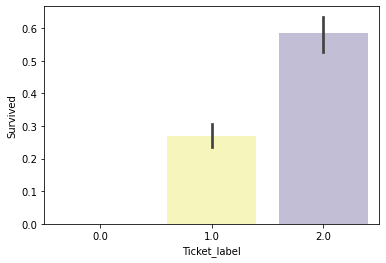

In [78]:
df.loc[(df['TicketGroup']>=2) & (df['TicketGroup']<=4), 'Ticket_label'] = 2
df.loc[(df['TicketGroup']>=5) & (df['TicketGroup']<=8) | (df['TicketGroup']==1), 'Ticket_label'] = 1  
df.loc[(df['TicketGroup']>=11), 'Ticket_label'] = 0
sns.barplot(x='Ticket_label', y='Survived', data=df, palette='Set3')
plt.show()

<AxesSubplot:xlabel='Cabin_label', ylabel='Survived'>

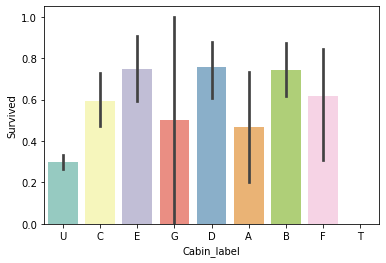

In [79]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin_label'] = df['Cabin'].str.get(0)
sns.barplot(x = 'Cabin_label', y = 'Survived', data = df, palette = 'Set3')

In [80]:
df['Embarked'] = df['Embarked'].fillna('S')

In [81]:
df = df[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Cabin_label','Ticket_label']]

df = pd.get_dummies(df)

train = df[df['Survived'].notnull()]
test = df[df['Survived'].isnull()].drop('Survived', axis = 1)

In [83]:
X = train.values[:,1:]
y = train.values[:,0]
test_x = test.values